In [94]:
library(readr)
library(dplyr)
library(ggplot2)
theme_set(theme_bw())
library(lubridate)
options(repr.plot.height=4, repr.plot.width = 7)

In [122]:
df <- read_csv('data/treasury_income.csv')

Parsed with column specification:
cols(
  ds = col_date(format = ""),
  mtd = col_integer(),
  rev = col_integer(),
  type = col_character(),
  ytd = col_integer()
)


In [123]:
df %>%
  mutate(yr = year(ds))%>%
  group_by(yr) %>%
  summarise(sum(rev))

yr,sum(rev)
2010,2032674
2011,2054471
2012,2197545
2013,2336752
2014,2562456
2015,2776850
2016,2764893
2017,2984852
2018,481617


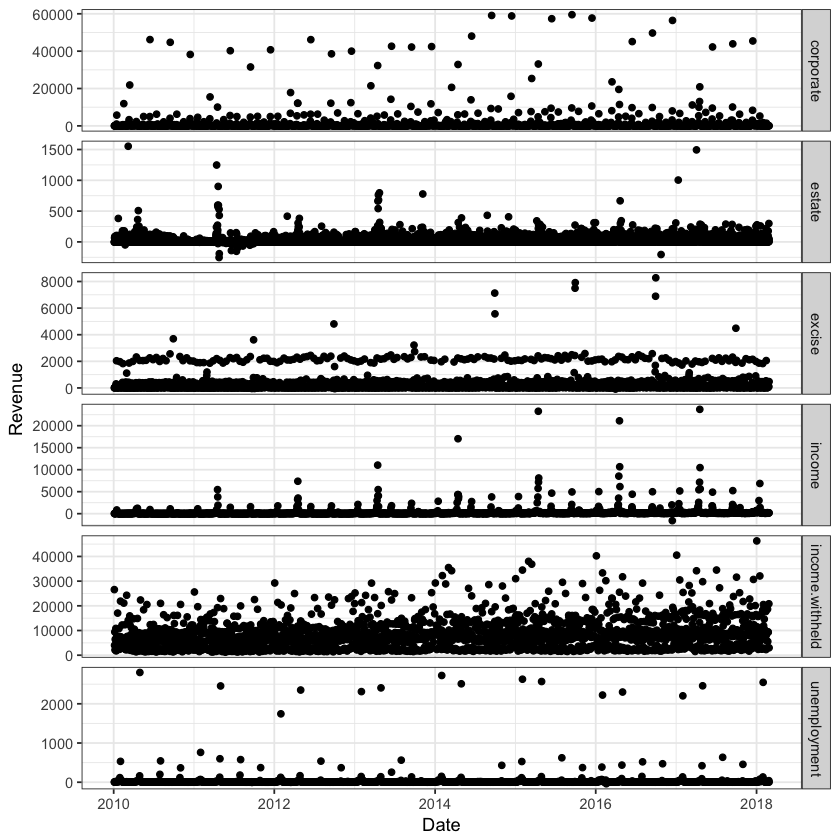

In [124]:
options(repr.plot.height=7, repr.plot.width = 7)
df %>% 
  filter(type != 'railroad') %>%
  ggplot(aes(x = ds, y = rev)) + 
  geom_point() + 
  facet_grid(type ~ ., scales = 'free_y') +
  xlab('Date') +
  ylab('Revenue')

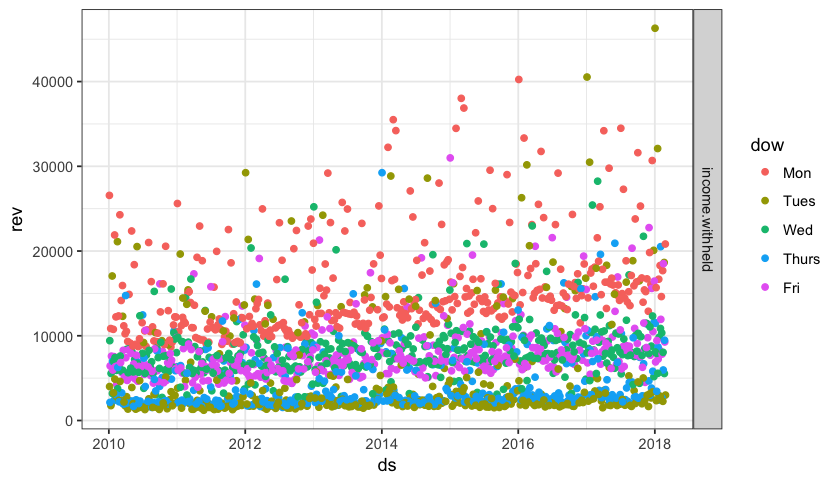

In [125]:
options(repr.plot.height=4, repr.plot.width = 7)
df %>% 
  mutate(dow = wday(ds, label = TRUE)) %>%
  filter(type == 'income.withheld') %>%
  ggplot(aes(x = ds, y = rev, colour = dow)) + 
  geom_point() + 
  facet_grid(type ~ ., scales = 'free_y')

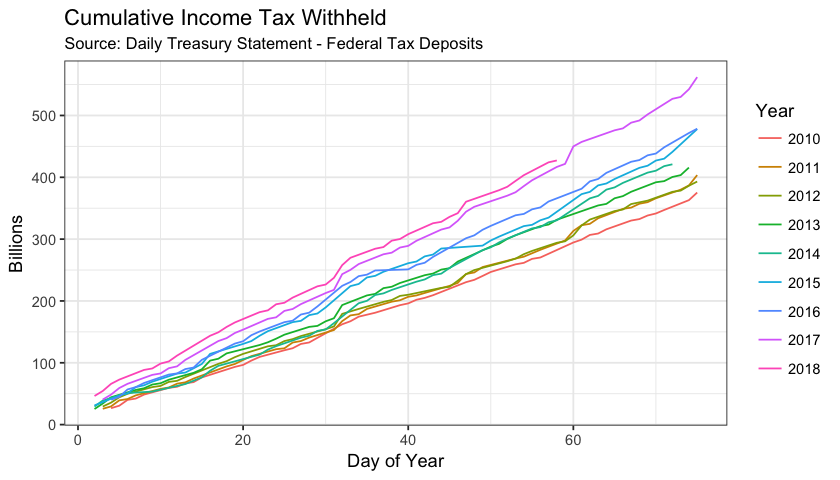

In [126]:
options(repr.plot.height=4, repr.plot.width = 7)
df %>% 
  filter(type == 'income.withheld') %>%
  mutate(`Year` = factor(year(ds)),
         doy = yday(ds)) %>%
  group_by(`Year`) %>%
  arrange(ds) %>%
  mutate(cum.rev = cumsum(rev)) %>%
  filter(doy <= 75) %>%
  ggplot(aes(x = doy, y = cum.rev/1000, colour = `Year`)) + 
  geom_line() +
  xlab('Day of Year') +
  ylab('Billions') +
  ggtitle('Cumulative Income Tax Withheld', 'Source: Daily Treasury Statement - Federal Tax Deposits')

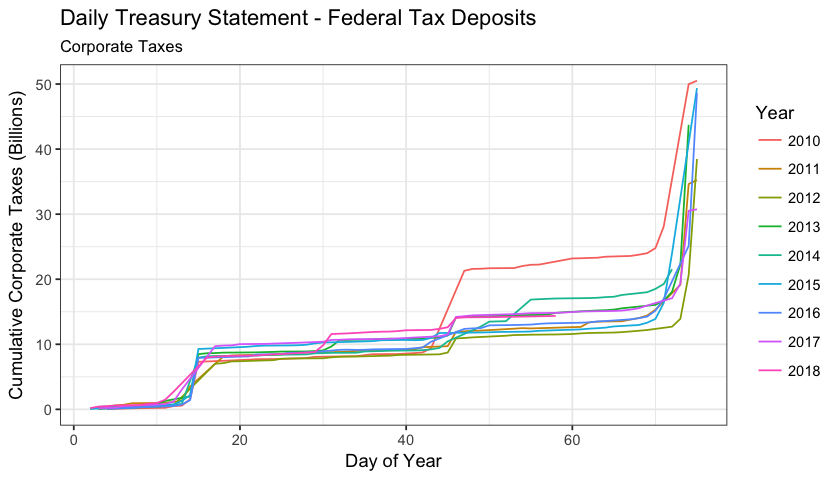

In [127]:
options(repr.plot.height=4, repr.plot.width = 7)
df %>% 
  filter(type == 'corporate') %>%
  mutate(`Year` = factor(year(ds)),
         doy = yday(ds)) %>%
  group_by(`Year`) %>%
  arrange(ds) %>%
  mutate(cum.rev = cumsum(rev)) %>%
  filter(doy <= 75) %>%
  ggplot(aes(x = doy, y = cum.rev/1000, colour = `Year`)) + 
  geom_line() +
  xlab('Day of Year') +
  ylab('Cumulative Corporate Taxes (Billions)') +
  ggtitle('Daily Treasury Statement - Federal Tax Deposits', 'Corporate Taxes')